### Question 1 : 

$$
K \left(x_N-\frac{L}{2} \right)^2+dx^2  \sum_{i=0}^{N} y_i^2
$$

$ K(x_N-\frac{L}{2})^2+dx^2 $ : Minimiser la distance entre le bout du tuyau et le parterre.

$ dx^2\sum_{i=0}^{N} y_i^2 $ : Minimiser l'encombrement du jardin en laissant le tuyau d'arrosage le plus proche possible du trajet en ligne droite entre le robinet et le pareterre

### Question 2 :  
Si on impose $ x_N = L/2 $ dès le début on devrait donner des conditions initiales vérifiant déjà cette condition. Ce qui n'est pas simple aux vues des autres conditions d'égalité.

### Question 3 : 

La courbure du tuyau au point $M$ appartenant à la courbe est donnée, par $ \frac{d^2\vec{M}}{dx^2} $ de norme au carré $ ||\frac{d^2\vec{M}}{dx^2}||^2 = \left( \frac{d^2x_M}{dx^2} \right)^2 + \left(\frac{d^2y_M}{dx^2} \right)^2 $ 

Si on se place maintenant au point $ (x_i, y_i) $ et qu'on se place dans le cas discret, donc on applique une méthode de différence finie on obtient :
$ ||\frac{d^2\vec{M}}{dx^2}|_{(x_i, y_i)}||^2 \approx (\frac{x_{i+1}-2x_{i}+x_{i-1}}{dx^2})^2 + (\frac{y_{i+1}-2y_{i}+y_{i-1}}{dx^2})^2 = \frac{(x_{i+1}-2x_{i}+x_{i-1})^2}{dx^4} + \frac{(y_{i+1}-2y_{i}+y_{i-1})^2}{dx^4}  $

Si on veut limiter cette courbure de telle sorte que $ ||\frac{d^2\vec{M}}{dx^2}|_{(x_i, y_i)}|| \le \gamma, \space \forall i \in [1,N] $ 

On trouve alors la condition :

$(x_{i+1}-2x_{i}+x_{i-1})^2 + (y_{i+1}-2y_{i}+y_{i-1})^2 \le dx^4 \gamma ^2, \space \forall i \in [1,N] $

### Question 4 : 

On pose $ z = (x_0, ..., x_N, y_0, ..., y_N) \in \mathbb{R}^{2N+2} $ 
On a 
$$
c_{eq}(z) = \begin{pmatrix} 
x_0 \\ y_0 \\ y_N \\ (x_1-x_0)^2 + (y_1-y_0)^2 - dx^2 \\ \vdots \\ (x_N-x_{N-1})^2 + (y_N-y_{N-1})^2 - dx^2 
\end{pmatrix} \in \mathbb{R}^{N+3}
$$
et
$$
c_{ineq}(z) = \begin{pmatrix} 
-y_1 \\ x_0-x_1 \\ \vdots \\ x_{N-1}-x_{N} \\ (x_{2}-2x_{1}+x_{0})^2 + (y_{2}-2y_{1}+y_{0})^2 - dx^4 \gamma ^2 \\ \vdots \\ (x_{N}-2x_{N-1}+x_{N-2})^2 + (y_{N}-2y_{N-1}+y_{N-2})^2 - dx^4 \gamma ^2 \end{pmatrix} \in \mathbb{R}^{2N}
$$

Ce qui représente au total N+3 condition d'égalité et 2N d'intégalité soit 3N+3 conditions.

et enfin :
$$
f(z) = K \left(x_N-\frac{L}{2} \right)^2+dx^2  \sum_{i=0}^{N} y_i^2
$$

### Question 5



### Question 6

In [49]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

In [105]:
N = 60
K = 10**5
L = 10
gamma = 3

def solve(N, K, L, gamma, z0) :
    
    dx = L/N
    
    opti = casadi.Opti()
    z = opti.variable(2*N+2)
    
    #bulding f
    S = 0
    for i in range(N+1) :
        S += z[N + 1 + i]**2

    f = K*(z[N] - 5)**2 + S * dx**2
    opti.minimize(f)

    #ceq
    opti.subject_to(z[0] == 0)
    opti.subject_to(z[N+1] == 0)
    opti.subject_to(z[2*N+1] == 0)
    opti.subject_to((z[1] - z[0])**2 + (z[N+2] - z[N+1])**2 - dx**2 == 0)
    
    #cineq
    opti.subject_to( z[N+2] >= 0)
    opti.subject_to( z[0] - z[1] <= 0)
    
    for i in range(1,N) :
        
        #ceq(bis)
        opti.subject_to( (z[i+1] - z[i])**2 + (z[N+2+i] - z[N+1+i])**2 - dx**2 == 0) #probleme : ici on fait pas dx²+dy² mais un genre de magie noire
        
        #cineq(bis)
        opti.subject_to( z[i] - z[i+1] <= 0)
        opti.subject_to((z[i+1] - 2 * z[i] + z[i-1])**2 + (z[N+1 + i + 1] - 2* z[N+1 + i]+ z[N + 1])**2 - (dx**4)*(gamma**2) <= 0)
    
    #solving
    opti.set_initial(z, z0)
    opti.solver('ipopt')
    sol = opti.solve()
    return sol.value(z)
    

In [101]:
N = 60
K = 10**5
L = 10
gamma = 3



In [102]:
# #setting z0 to isoceles triangles
# z0 = np.arange(2 * N + 2, dtype = 'float64')
# dx = L/N

# #setting x_i
# z0[:N+1] *= dx/np.sqrt(2)

# #setting y_i
# z0[N+1] = 0
# z0[N+2::2] = dx/np.sqrt(2)
# z0[N+3::2] = 0

# #visualizat
# fig = plt.figure()
# sub1 = fig.add_subplot(211)
# sub1.plot(z0[:N+1], z0[N+1:])
# sub1.title.set_text('situation initiale')
# sub1.axvline(x=L/np.sqrt(2), color = 'r')
# plt.figtext(.92, .8, r"$ \frac{L}{\sqrt{2}} $", color = 'r', size = 20)
# sub1.axhline(y=dx/np.sqrt(2), color = 'g')
# plt.figtext(.7, 1, r"$ \frac{dx}{\sqrt{2}} $", color = 'g', size = 20)
# sub1.axhline(y=0, color = 'g')
# plt.figtext(.91, .52, r"$ 0 $", color = 'g', size = 20)


# sub2 = fig.add_subplot(212)
# sub2.plot(z0[:N+1], z0[N+1:])
# plt.xlim(0,2)
# sub2.title.set_text('zoom sur le début')

# fig.tight_layout()

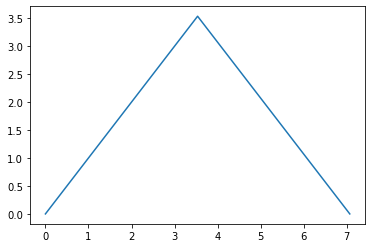

In [107]:
z0 = np.arange(2 * N + 2, dtype = 'float64')
dx = L/N

z0[:N+1] = np.arange(0, L/np.sqrt(2)+10**-7, dx/np.sqrt(2))

z0[N + 1 : N + 1 + N//2 + 1] = np.arange(0,L/(2*np.sqrt(2))+10**-7,dx/np.sqrt(2))
z0[N + N//2 + 2:  ] = L/(2*np.sqrt(2)) - np.arange(dx/np.sqrt(2), L/(2*np.sqrt(2)) + 10**-7, dx/np.sqrt(2))


plt.plot(z0[:N+1], z0[N+1:])



This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      119

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 8.4060934e+005 2.13e+000 2.93e+008  -1.0 6.93e-001   8.7 6.20e-001 4.67e-003h  1
  91 8.4064641e+005 2.13e+000 2.91e+008  -1.0 9.42e-001   8.2 1.06e-002 4.21e-004h  1
  92 8.4083922e+005 2.13e+000 2.90e+008  -1.0 6.92e-001   8.6 2.74e-004 1.87e-003h  1
  93 8.4330460e+005 2.07e+000 2.90e+008  -1.0 1.42e+000   8.1 9.03e-007 2.77e-002f  1
  94 8.4340001e+005 2.07e+000 2.92e+008  -1.0 6.79e-001   8.5 2.59e-002 1.03e-003h  1
  95r8.4340001e+005 2.07e+000 1.00e+003   0.3 0.00e+000   8.1 0.00e+000 3.51e-007R  5
  96r9.2242069e+005 7.97e-001 9.98e+002   0.3 1.05e+003    -  4.07e-003 1.50e-003f  1
  97 8.6428757e+005 7.64e-001 1.41e+002  -1.0 3.08e+000    -  5.06e-002 3.73e-002f  1
  98 8.1162791e+005 7.33e-001 1.36e+002  -1.0 2.81e+000    -  2.20e-002 3.64e-002f  1
  99 7.7999427e+005 7.13e-001 1.33e+002  -1.0 2.81e+000    -  1.88e-002 2.39e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 183 1.0669448e+006 1.28e-001 1.75e+010  -1.0 5.85e-001   9.5 4.74e-003 4.73e-005h  1
 184r1.0669448e+006 1.28e-001 1.00e+003  -0.9 0.00e+000   9.0 0.00e+000 3.15e-007R  2
 185r1.1233723e+006 1.20e-001 9.98e+002  -0.9 7.10e+001    -  2.04e-003 1.78e-003f  1
 186r1.4253076e+006 1.29e-001 9.97e+002  -0.9 1.90e+002    -  1.24e-003 2.23e-003f  1
 187r1.5063131e+006 1.23e-001 9.94e+002  -0.9 3.91e+001    -  1.79e-002 2.72e-003f  1
 188r1.5506581e+006 1.09e-001 9.77e+002  -0.9 3.48e+000    -  7.45e-002 1.82e-002f  1
 189r1.5305131e+006 1.24e-001 8.93e+002  -0.9 2.98e-001    -  7.63e-002 8.60e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190r1.5328092e+006 1.15e-001 7.66e+002  -0.9 4.96e-001   2.0 1.08e-001 1.43e-001f  1
 191 1.5299497e+006 1.14e-001 1.89e+002  -1.0 5.80e+000    -  8.71e-004 2.35e-003f  1
 192 1.5299493e+006 1.14e-001 7.80e+004  -1.0 1.04e-001   8.5 1.00e+000 7.34e-005h  1
 193 1.5510653e+006 1.10e-001 7.15e+004  -1.0 7.51e-001    

(1.0, 2.0)

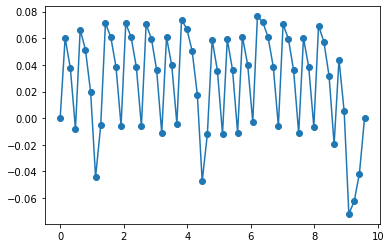

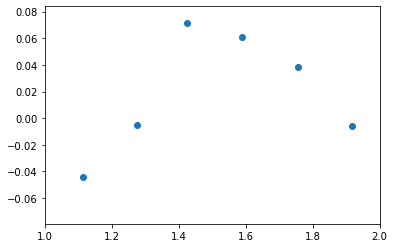

In [113]:
sol = solve(N, K, L, gamma, z0)

plt.figure()
plt.plot(sol[:N+1], sol[N+1 : ], '-o')
plt.figure()

plt.scatter(sol[:N+1], sol[N+1 : ])
plt.xlim(1,2)


In [114]:
for i in range(N) : print((sol[i+1] - sol[i])**2 + (sol[N+2+i] - sol[N+1+i])**2)

0.027777777777778696
0.027777777777777783
0.02777777777777803
0.027777777777779643
0.027777777777777794
0.027777777777778366
0.02777777777777892
0.02777777777777827
0.027777777777780142
0.027777777777777773
0.02777777777777809
0.02777777777777821
0.027777777777780406
0.027777777777777724
0.027777777777778307
0.027777777777778394
0.027777777777780302
0.027777777777777818
0.027777777777778425
0.027777777777778533
0.027777777777779546
0.027777777777777835
0.027777777777778085
0.027777777777780753
0.027777777777777804
0.02777777777777817
0.027777777777779164
0.02777777777777931
0.027777777777778075
0.027777777777779344
0.02777777777777779
0.027777777777778255
0.027777777777779167
0.027777777777778043
0.027777777777778307
0.02777777777777958
0.02777777777777783
0.027777777777777797
0.027777777777781516
0.02777777777777804
0.027777777777777953
0.027777777777778893
0.027777777777778505
0.027777777777780607
0.02777777777777771
0.02777777777777827
0.027777777777778727
0.02777777777777947
0.0277